Agnaldo Nunes de Oliveira - <strong>11221946</strong>

Gustavo Santos Morais - <strong>11221932</strong>

Matheus Barbosa Silva - <strong>11221741</strong>
***
<font size="5"> <strong> EP1 - MAC0209 - Modelagem e Simulação de EDOs </strong></font>
***
O movimento modelado descreve o lançamento de um projétil lançado em um plano $xOy$ a partir de um dado ponto $(x_{0}, y_{0})$ com uma velocidade escalar $v$ e velocidade vetorial com inclinação $\theta$ com relação ao eixo $x$. Este movimento pode ser desmembrado em dois movimentos distintos, um em cada eixo.

<i>Obs.:</i> obtém-se as velocidades iniciais em cada eixo a partir da velocidade escalar do seguinte modo: $\vec{v_{0}} = (v_{0}cos(\theta),v_{0}sen(\theta))$

No eixo $x$, a aceleração desempenhada é constante nula, isto é: $\frac{d^{2}x(t)}{dt^{2}} = 0$ e, portanto, a velocidade desempenhada pela partícula durante o movimento modelado é, também, constante. Assim, a partícula imprime um movimento do tipo retílineo uniforme (M.R.U.) sobre este eixo.

No eixo $y$, a partícula move-se sofrendo a aceleração constante da gravidade ($g$), isto é: $\frac{d^{2}y(t)}{dt^{2}} = -g$ e o movimento é, portanto, do tipo retilíneo uniformemente variado (M.R.U.V.).

# Preâmbulo

In [0]:
#LANÇAMENTO DE UM PROJÉTIL
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import os
import numpy as np
import math
from matplotlib import animation, rc
from IPython.display import HTML
import random
import requests
import os
from io import BytesIO

g = 9.80665

# Modelagem e Análise Gráfica

Para calcular a posição do ponto no eixo $x$ analiticamente, uso $x(t)=x_{0}+v_{0}cos(\theta)t$ (aqui, guardo $x_{0}$ em paramsX[1] e $v_{0}cos(\theta)$ em paramsX[0]).

Para calcular a abscissa do ponto pelo método de Euler, uso que $x_{next} = x_{ant} + (v_{0}cos(\theta)\Delta t)$, fórmula deduzida no relatório.

Aqui, modela-se um movimento do tipo retilíneo uniforme (M.R.U.), como feito anteriormente. Ambas as formulas são deduzidas com maiores detalhes no relatório deste exercício-programa.

In [0]:
def nextXanalytical(t, params):
  return (params[1] + params[0]*t)

def nextXeuler(x, dt, params):
  return x + dt*params[0]

Para calcular a posição do ponto no eixo $y$ analiticamente, uso $y(t)=y_{0}+v_{0}sen(\theta)t - \frac{-gt^2}{2}$ (aqui, guardo $y_{0}$ em params[2], $v_{0}sen(\theta)$ em params[1] e $-g$ em paramsY[0]).

Para calcular a ordenada do ponto pelo método de Euler, uso que $y_{next} = y_{ant} + (v_{0}sen(\theta)\Delta t) -gt\Delta t$.

Aqui, modela-se um movimento do tipo retilíneo uniformemente variado (M.R.U.V.), como feito anteriormente. Ambas as formulas são deduzidas com maiores detalhes no relatório deste exercício-programa.

In [0]:
def nextYanalytical(t, params):
  return (params[2] + params[1]*t + (params[0]*t*t)/2)

def nextYeuler(y, t, dt, params):
  return (y + params[1]*dt + params[0]*t*dt)

Erro (Y):  0.0
Erro (X):  0.0
Erro (Y):  -0.30645781250007076
Erro (X):  0.0
Erro (Y):  -0.6129156250000278
Erro (X):  1.1368683772161603e-13
Erro (Y):  -0.9193734375000986
Erro (X):  1.1368683772161603e-13
Erro (Y):  -1.2258312500000557
Erro (X):  2.2737367544323206e-13
Erro (Y):  -1.5322890625001264
Erro (X):  2.2737367544323206e-13
Erro (Y):  -1.8387468750000835
Erro (X):  2.2737367544323206e-13
Erro (Y):  -2.1452046875001543
Erro (X):  2.2737367544323206e-13
Erro (Y):  -2.4516625000001113
Erro (X):  2.2737367544323206e-13
Erro (Y):  -2.7581203125000684
Erro (X):  0.0
Erro (Y):  -3.064578125000139
Erro (X):  0.0
Erro (Y):  -3.3710359375000962
Erro (X):  0.0
Erro (Y):  -3.677493750000167
Erro (X):  -2.2737367544323206e-13
Erro (Y):  -3.983951562500124
Erro (X):  -2.2737367544323206e-13
Erro (Y):  -4.290409375000195
Erro (X):  -2.2737367544323206e-13
Erro (Y):  -4.596867187500152
Erro (X):  -4.547473508864641e-13
Erro (Y):  -4.903325000000109
Erro (X):  -4.547473508864641e-13
Erro (Y)

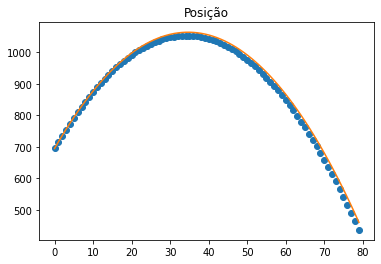

In [14]:
v0 = 170
th = math.pi/6
a = -g
y = 695
paramsY = [a, v0*math.sin(th), y]

x = 780
paramsX = [v0*math.cos(th), x]

t = 0
dt = 0.25
tf = 20

vYe = []
vYa = []
vXe = []
vXa = []
while (t < tf):
  vYa.append(nextYanalytical(t, paramsY))
  vXa.append(nextXanalytical(t, paramsX))
  vYe.append(y)
  vXe.append(x)
  print('Erro (Y): ', y - nextYanalytical(t,paramsY))
  print('Erro (X): ', x - nextXanalytical(t,paramsX))
  t += dt
  y = nextYeuler(y, t, dt, paramsY)
  x = nextXeuler(x, dt, paramsX)
plt.figure(0)
plt.plot(vYe, label='Euler', linestyle='',marker='o') 
plt.plot(vYa, label='Analítico') 
plt.title('Posição')
plt.show(block=False)

# Animação

Para a animação, usamos o código mostrado em aula como base. As mudanças feitas foram:
<ul>
  <li>O link para a imagem;</li>
  <li>Os vetores usados para simular os movimentos, que nesse caso são os vetores com os valores dos pontos em $x$ e $y$, em função do tempo (vYa, vYe, vXa e vXe).</li>
</ul>
<p>Assim como anteriormente, foi necessário inverter o sentido do eixo $y$ no gráfico que envolve a imagem, pois a origem fica, por padrão, na parte de cima. Dessa forma, o eixo foi invertido para que a simulação exiba o trajeto calculado de acordo com as expectativas (como o eixo foi invertido, a imagem também precisa acompanhar essa rotação).</p>

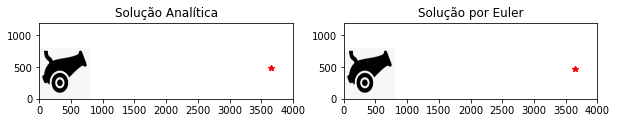

In [5]:
xAnim = vXa
yAnim = vYa

def initAnimate():
  line0.set_data([], [])
  line1.set_data([], [])
  return (line0, line1)

def loadImage():
  imgurl='https://www.netclipart.com/pp/m/307-3078709_cannon-icon-png.png'
  img = plt.imread(BytesIO(requests.get(imgurl).content))
  img = np.flipud(img)
  return(img)

# animation function. This is called sequentially  
def animate(i):
    ind0 = i%len(xAnim)
    ind1 = ind0
    
    line0.set_data([xAnim[ind0], xAnim[ind1]] , [yAnim[ind0], yAnim[ind1]])
    line1.set_data([vXe[ind0], vXe[ind1]] , [vYe[ind0], vYe[ind1]])
    return (line0, line1)

def createAnimPlot(xAnim):
    img = loadImage()
    plt.close()

    figAnim, axAnim = plt.subplots(1, 2, figsize = (10, 10))
    axAnim[0].set_title("Solução Analítica")
    axAnim[0].set_ylim([0,1200])
    axAnim[0].set_xlim([0,4000])
    axAnim[0].imshow(img, origin = 'lower', extent=[0, 800, 0, 800])

    axAnim[1].set_title("Solução por Euler")
    axAnim[1].set_ylim([0,1200])
    axAnim[1].set_xlim([0,4000])
    axAnim[1].imshow(img, origin = 'lower', extent=[0, 800, 0, 800])
    
    line0, = axAnim[0].plot([], [], 'r-*', lw=5)
    line1, = axAnim[1].plot([], [], 'r-*', lw=5)
    nFrames=len(xAnim)-1
    
    return(figAnim, axAnim, nFrames, line0, line1)

figAnim, axAnim, nFrames, line0, line1 = createAnimPlot(xAnim)

anim = animation.FuncAnimation(figAnim, animate, init_func=initAnimate,
                            frames=nFrames, interval=1000, blit=True)

rc('animation', html='jshtml')
anim